In [1]:
import matplotlib.pyplot as plt
from math import comb
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon

### Ejercicio 1:
Un inversionista tiene dos acciones: la acción A y la acción B. Cada acción puede aumentar de valor, disminuir de valor o permanecer sin cambios. Considere el experimento de invertir en las dos acciones y observar el cambio (si lo hay) en el valor.

a. ¿Cuántos resultados experimentales son posibles?

b. Muestra un diagrama de árbol para el experimento.

c. ¿Cuántos de los resultados experimentales resultan en un aumento en el valor de al menos una de las dos acciones?

d. ¿Cuántos de los resultados experimentales resultan en un aumento en el valor de ambas acciones?

a. Número de resultados experimentales posibles: 9

b. Diagrama de árbol:


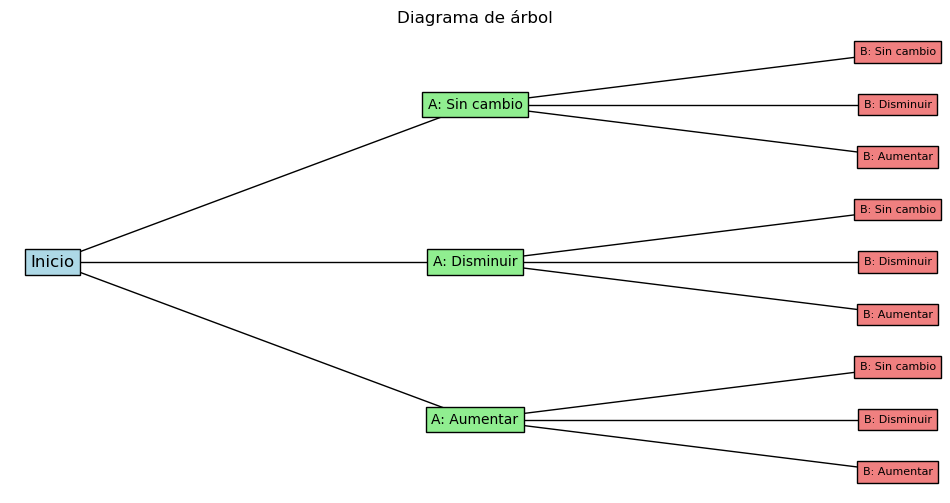


c. Número de resultados con al menos un aumento: 5
d. Número de resultados con aumento en ambas acciones: 1


In [3]:
# a. Número de resultados experimentales posibles
resultados_posibles = 3 ** 2  # Cada acción tiene 3 resultados y hay 2 acciones
print(f"a. Número de resultados experimentales posibles: {resultados_posibles}")

# b. Diagrama de árbol dibujado manualmente (horizontal)
print("\nb. Diagrama de árbol:")

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Diagrama de árbol")
ax.axis('off')  # Ocultar ejes

# Coordenadas para los nodos
x_inicio, y_inicio = 0.1, 0.5  # Posición del nodo raíz
x_offset = 0.2  # Desplazamiento horizontal entre niveles
y_offset = 0.2  # Desplazamiento vertical entre nodos

# Dibujar el nodo raíz
ax.text(x_inicio, y_inicio, "Inicio", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', edgecolor='black'))

# Nombres de las acciones
acciones = ['Aumentar', 'Disminuir', 'Sin cambio']

# Dibujar los nodos y aristas para la acción A
for i, accion_A in enumerate(acciones):
    x_A = x_inicio + x_offset  # Posición horizontal de los nodos de la acción A
    y_A = y_inicio - 0.3 + i * 0.3  # Posición vertical de los nodos de la acción A

    # Dibujar el nodo de la acción A
    ax.text(x_A, y_A, f"A: {accion_A}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightgreen', edgecolor='black'))

    # Dibujar la arista desde el nodo raíz al nodo de la acción A
    ax.plot([x_inicio, x_A], [y_inicio, y_A], 'k-', lw=1)

    # Dibujar los nodos y aristas para la acción B
    for j, accion_B in enumerate(acciones):
        x_B = x_A + x_offset  # Posición horizontal de los nodos de la acción B
        y_B = y_A - 0.1 + j * 0.1  # Posición vertical de los nodos de la acción B

        # Dibujar el nodo de la acción B
        ax.text(x_B, y_B, f"B: {accion_B}", ha='center', va='center', fontsize=8, bbox=dict(facecolor='lightcoral', edgecolor='black'))

        # Dibujar la arista desde el nodo de la acción A al nodo de la acción B
        ax.plot([x_A, x_B], [y_A, y_B], 'k-', lw=1)

# Mostrar el gráfico
plt.show()

# c. Resultados con al menos un aumento
resultados_con_al_menos_un_aumento = 0
for accion_A in acciones:
    for accion_B in acciones:
        if accion_A == 'Aumentar' or accion_B == 'Aumentar':
            resultados_con_al_menos_un_aumento += 1

print(f"\nc. Número de resultados con al menos un aumento: {resultados_con_al_menos_un_aumento}")

# d. Resultados con aumento en ambas acciones
resultados_con_aumento_en_ambas = 0
for accion_A in acciones:
    for accion_B in acciones:
        if accion_A == 'Aumentar' and accion_B == 'Aumentar':
            resultados_con_aumento_en_ambas += 1

print(f"d. Número de resultados con aumento en ambas acciones: {resultados_con_aumento_en_ambas}")

### Ejercicio 2:
El muestreo aleatorio simple utiliza una muestra de tamaño \( n \) de una población de tamaño \( N \) para obtener datos que pueden usarse para hacer inferencias sobre las características de una población. Supongamos que tenemos una población de 50 cuentas bancarias y queremos tomar una muestra aleatoria de 4 cuentas para aprender sobre la población. ¿Cuántas muestras aleatorias diferentes de 4 cuentas son posibles?

In [5]:
# Datos del problema
N = 50  # Tamaño de la población
n = 4   # Tamaño de la muestra

# Calcular el número de combinaciones posibles
numero_combinaciones = comb(N, n)

# Mostrar el resultado
print(f"El número de muestras aleatorias diferentes de {n} cuentas de un total de {N} es: {numero_combinaciones}")

El número de muestras aleatorias diferentes de 4 cuentas de un total de 50 es: 230300


### Ejercicio 3:
El gerente de una tienda de muebles vende de 0 a 4 aparadores cada semana. Con base en la experiencia pasada, se asignan las siguientes probabilidades a las ventas de 0, 1, 2, 3 o 4 aparadores:

- \( P(0) = 0.08 \)
- \( P(1) = 0.18 \)
- \( P(2) = 0.32 \)
- \( P(3) = 0.30 \)
- \( P(4) = 0.12 \)

a. ¿Son válidas estas asignaciones de probabilidad? ¿Por qué sí o por qué no?

b. Sea \( A \) el evento de que se vendan 2 o menos aparadores en una semana. Encuentra \( P(A) \).

c. Sea \( B \) el evento de que se vendan 4 o más aparadores en una semana. Encuentra \( P(B) \).

In [7]:
# Probabilidades dadas
probabilidades = {
    0: 0.08,
    1: 0.18,
    2: 0.32,
    3: 0.30,
    4: 0.12
}

# a. Validación de las probabilidades
suma_probabilidades = sum(probabilidades.values())
probabilidades_validas = all(0 <= p <= 1 for p in probabilidades.values()) and abs(suma_probabilidades - 1) < 1e-6

print("a. ¿Son válidas estas asignaciones de probabilidad?")
print("Sí" if probabilidades_validas else "No")
print(f"   La suma de las probabilidades es: {suma_probabilidades:.2f}")

# b. Cálculo de P(A): Evento de que se vendan 2 o menos aparadores
P_A = probabilidades[0] + probabilidades[1] + probabilidades[2]
print(f"\nb. P(A): Probabilidad de vender 2 o menos aparadores: {P_A:.2f}")

# c. Cálculo de P(B): Evento de que se vendan 4 o más aparadores
P_B = probabilidades[4]
print(f"c. P(B): Probabilidad de vender 4 o más aparadores: {P_B:.2f}")

a. ¿Son válidas estas asignaciones de probabilidad?
Sí
   La suma de las probabilidades es: 1.00

b. P(A): Probabilidad de vender 2 o menos aparadores: 0.58
c. P(B): Probabilidad de vender 4 o más aparadores: 0.12


### Ejercicio 4:
Sea \( A \) el evento de que el medio principal de transporte de una persona para ir y volver del trabajo sea un automóvil, y sea \( B \) el evento de que el medio principal de transporte sea un autobús. Supongamos que en una gran ciudad encontramos que \( P(A) = 0.45 \) y \( P(B) = 0.35 \).

a. ¿Son los eventos \( A \) y \( B \) mutuamente excluyentes? ¿Cuál es la probabilidad de que una persona use un automóvil o un autobús para ir y volver del trabajo?

b. Encuentra la probabilidad de que el medio principal de transporte de una persona sea algo distinto a un autobús.

In [9]:
# Probabilidades dadas
P_A = 0.45  # Probabilidad de usar automóvil
P_B = 0.35  # Probabilidad de usar autobús

# a. Eventos mutuamente excluyentes y P(A ∪ B)
son_mutuamente_excluyentes = True  # Asumimos que son mutuamente excluyentes
P_A_union_B = P_A + P_B

print("a. ¿Son los eventos A y B mutuamente excluyentes?")
print("Sí" if son_mutuamente_excluyentes else "No")
print(f"   Probabilidad de usar automóvil o autobús (P(A ∪ B)): {P_A_union_B:.2f}")

# b. Probabilidad de que el medio de transporte no sea un autobús
P_B_complemento = 1 - P_B
print(f"\nb. Probabilidad de que el medio de transporte no sea un autobús (P(B^c)): {P_B_complemento:.2f}")

a. ¿Son los eventos A y B mutuamente excluyentes?
Sí
   Probabilidad de usar automóvil o autobús (P(A ∪ B)): 0.80

b. Probabilidad de que el medio de transporte no sea un autobús (P(B^c)): 0.65


### Ejercicio 5:
Un nightclub en Benicassim tiene los siguientes datos sobre la edad y el estado civil de 140 clientes:

| Edad         | Estado Civil | Soltero | Casado |
|--------------|--------------|---------|--------|
| Menor de 30  |              | 77      | 14     |
| 30 o más     |              | 28      | 21     |

a. Desarrolla una tabla de probabilidad conjunta para estos datos.

b. Usa las probabilidades marginales para comentar sobre la edad de los clientes que asisten al club.

c. Usa las probabilidades marginales para comentar sobre el estado civil de los clientes que asisten al club.

d. ¿Cuál es la probabilidad de encontrar un cliente que sea soltero y menor de 30 años?

e. Si un cliente es menor de 30 años, ¿cuál es la probabilidad de que sea soltero?

f. ¿El estado civil es independiente de la edad? Explica usando probabilidades.

In [11]:
# Datos
datos = {
    "Edad": ["Menor de 30", "Menor de 30", "30 o más", "30 o más"],
    "Estado Civil": ["Soltero", "Casado", "Soltero", "Casado"],
    "Frecuencia": [77, 14, 28, 21]
}

# Crear un DataFrame con los datos
df = pd.DataFrame(datos)

# a. Tabla de probabilidad conjunta
total_clientes = df["Frecuencia"].sum()
df["Probabilidad Conjunta"] = df["Frecuencia"] / total_clientes

print("a. Tabla de probabilidad conjunta:")
print(df)

# b. Probabilidades marginales para la edad
prob_menor_30 = df[df["Edad"] == "Menor de 30"]["Probabilidad Conjunta"].sum()
prob_30_o_mas = df[df["Edad"] == "30 o más"]["Probabilidad Conjunta"].sum()

print("\nb. Probabilidades marginales para la edad:")
print(f"P(Menor de 30): {prob_menor_30:.2f}")
print(f"P(30 o más): {prob_30_o_mas:.2f}")

# c. Probabilidades marginales para el estado civil
prob_soltero = df[df["Estado Civil"] == "Soltero"]["Probabilidad Conjunta"].sum()
prob_casado = df[df["Estado Civil"] == "Casado"]["Probabilidad Conjunta"].sum()

print("\nc. Probabilidades marginales para el estado civil:")
print(f"P(Soltero): {prob_soltero:.2f}")
print(f"P(Casado): {prob_casado:.2f}")

# d. Probabilidad de ser soltero y menor de 30 años
prob_soltero_menor_30 = df[(df["Edad"] == "Menor de 30") & (df["Estado Civil"] == "Soltero")]["Probabilidad Conjunta"].sum()

print("\nd. Probabilidad de ser soltero y menor de 30 años:")
print(f"P(Soltero y Menor de 30): {prob_soltero_menor_30:.2f}")

# e. Probabilidad de ser soltero dado que es menor de 30 años
prob_soltero_dado_menor_30 = prob_soltero_menor_30 / prob_menor_30

print("\ne. Probabilidad de ser soltero dado que es menor de 30 años:")
print(f"P(Soltero | Menor de 30): {prob_soltero_dado_menor_30:.2f}")

# f. Independencia entre estado civil y edad
# Para que sean independientes, P(A ∩ B) = P(A) * P(B)
prob_independencia_soltero_menor_30 = prob_soltero * prob_menor_30

print("\nf. ¿El estado civil es independiente de la edad?")
if abs(prob_soltero_menor_30 - prob_independencia_soltero_menor_30) < 1e-6:
    print("Sí, el estado civil es independiente de la edad.")
else:
    print("No, el estado civil no es independiente de la edad.")

a. Tabla de probabilidad conjunta:
          Edad Estado Civil  Frecuencia  Probabilidad Conjunta
0  Menor de 30      Soltero          77                   0.55
1  Menor de 30       Casado          14                   0.10
2     30 o más      Soltero          28                   0.20
3     30 o más       Casado          21                   0.15

b. Probabilidades marginales para la edad:
P(Menor de 30): 0.65
P(30 o más): 0.35

c. Probabilidades marginales para el estado civil:
P(Soltero): 0.75
P(Casado): 0.25

d. Probabilidad de ser soltero y menor de 30 años:
P(Soltero y Menor de 30): 0.55

e. Probabilidad de ser soltero dado que es menor de 30 años:
P(Soltero | Menor de 30): 0.85

f. ¿El estado civil es independiente de la edad?
No, el estado civil no es independiente de la edad.


### Ejercicio 6 (Teorema de Bayes):
Una firma de consultoría ha presentado una oferta para un gran proyecto de investigación. La gerencia de la firma inicialmente cree que tiene un 50-50 de posibilidades de obtener el proyecto. Sin embargo, la agencia a la que se presentó la oferta ha solicitado información adicional. La experiencia pasada indica que en el 75% de las ofertas exitosas y en el 40% de las ofertas no exitosas, la agencia solicitó información adicional.

a. ¿Cuál es la probabilidad previa de que la oferta sea exitosa (es decir, antes de la solicitud de información adicional)?

b. ¿Cuál es la probabilidad condicional de que se solicite información adicional dado que la oferta será exitosa?

c. Calcula la probabilidad posterior de que la oferta sea exitosa dado que se ha recibido una solicitud de información adicional.

In [13]:
# Probabilidades dadas
P_exitosa = 0.5  # Probabilidad previa de que la oferta sea exitosa
P_info_dado_exitosa = 0.75  # Probabilidad de solicitar información dado que es exitosa
P_info_dado_no_exitosa = 0.4  # Probabilidad de solicitar información dado que no es exitosa

# a. Probabilidad previa de que la oferta sea exitosa
print("a. Probabilidad previa de que la oferta sea exitosa:")
print(f"P(Exitosa): {P_exitosa:.2f}")

# b. Probabilidad condicional de solicitar información adicional dado que la oferta es exitosa
print("\nb. Probabilidad condicional de solicitar información adicional dado que la oferta es exitosa:")
print(f"P(Información | Exitosa): {P_info_dado_exitosa:.2f}")

# c. Probabilidad posterior de que la oferta sea exitosa dado que se solicitó información adicional
# Calculamos P(Información) usando la ley de la probabilidad total
P_informacion = (P_info_dado_exitosa * P_exitosa) + (P_info_dado_no_exitosa * (1 - P_exitosa))

# Aplicamos el Teorema de Bayes
P_exitosa_dado_info = (P_info_dado_exitosa * P_exitosa) / P_informacion

print("\nc. Probabilidad posterior de que la oferta sea exitosa dado que se solicitó información adicional:")
print(f"P(Exitosa | Información): {P_exitosa_dado_info:.2f}")

a. Probabilidad previa de que la oferta sea exitosa:
P(Exitosa): 0.50

b. Probabilidad condicional de solicitar información adicional dado que la oferta es exitosa:
P(Información | Exitosa): 0.75

c. Probabilidad posterior de que la oferta sea exitosa dado que se solicitó información adicional:
P(Exitosa | Información): 0.65


### Ejercicio 7:
Se presenta una serie de experimentos y variables aleatorias asociadas. En cada caso, identifica los valores que puede tomar la variable aleatoria y determina si es discreta o continua.

| Experimento                                      | Variable Aleatoria (x)                          |
|--------------------------------------------------|------------------------------------------------|
| a. Tomar un examen de 20 preguntas.              | Número de preguntas respondidas correctamente.  |
| b. Observar los autos que llegan a una cabina de peaje durante una hora. | Número de autos que llegan a la cabina de peaje. |
| c. Auditar 50 declaraciones de impuestos.        | Número de declaraciones con errores.            |
| d. Observar el trabajo de un empleado.           | Número de horas no productivas en un día de 8 horas. |
| e. Pesar un envío de mercancías.                 | Número de libras.                               |

In [15]:
# Definir los experimentos y sus variables aleatorias
experimentos = [
    {
        "descripcion": "Tomar un examen de 20 preguntas.",
        "variable": "Número de preguntas respondidas correctamente.",
        "valores": list(range(21)),  # Puede tomar valores de 0 a 20
        "tipo": "discreta"
    },
    {
        "descripcion": "Observar los autos que llegan a una cabina de peaje durante una hora.",
        "variable": "Número de autos que llegan a la cabina de peaje.",
        "valores": "0, 1, 2, ...",  # Puede tomar cualquier valor entero no negativo
        "tipo": "discreta"
    },
    {
        "descripcion": "Auditar 50 declaraciones de impuestos.",
        "variable": "Número de declaraciones con errores.",
        "valores": list(range(51)),  # Puede tomar valores de 0 a 50
        "tipo": "discreta"
    },
    {
        "descripcion": "Observar el trabajo de un empleado.",
        "variable": "Número de horas no productivas en un día de 8 horas.",
        "valores": "Cualquier valor en el intervalo [0, 8]",  # Puede tomar cualquier valor en ese rango
        "tipo": "continua"
    },
    {
        "descripcion": "Pesar un envío de mercancías.",
        "variable": "Número de libras.",
        "valores": "Cualquier valor no negativo",  # Puede tomar cualquier valor real no negativo
        "tipo": "continua"
    }
]

# Mostrar los resultados
print("Resultados para cada experimento:")
for i, exp in enumerate(experimentos, 1):
    print(f"\nExperimento {i}:")
    print(f"Descripción: {exp['descripcion']}")
    print(f"Variable Aleatoria: {exp['variable']}")
    print(f"Valores posibles: {exp['valores']}")
    print(f"Tipo de variable: {exp['tipo']}")

Resultados para cada experimento:

Experimento 1:
Descripción: Tomar un examen de 20 preguntas.
Variable Aleatoria: Número de preguntas respondidas correctamente.
Valores posibles: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Tipo de variable: discreta

Experimento 2:
Descripción: Observar los autos que llegan a una cabina de peaje durante una hora.
Variable Aleatoria: Número de autos que llegan a la cabina de peaje.
Valores posibles: 0, 1, 2, ...
Tipo de variable: discreta

Experimento 3:
Descripción: Auditar 50 declaraciones de impuestos.
Variable Aleatoria: Número de declaraciones con errores.
Valores posibles: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Tipo de variable: discreta

Experimento 4:
Descripción: Observar el trabajo de un empleado.
Variable Aleatoria: Número de horas no productivas en un día 

### Ejercicio 8:
Un servicio de ambulancia voluntario maneja de 0 a 5 llamadas de servicio en un día cualquiera. La distribución de probabilidad para el número de llamadas de servicio se muestra a continuación:

| Número de llamadas de servicio | Probabilidad |
|-------------------------------|--------------|
| 0                             | 0.10         |
| 1                             | 0.15         |
| 2                             | 0.30         |
| 3                             | 0.20         |
| 4                             | 0.15         |
| 5                             | 0.10         |

a. ¿Cuál es el número esperado de llamadas de servicio?

b. ¿Cuál es la varianza en el número de llamadas de servicio? ¿Cuál es la desviación estándar?

In [17]:
# Datos
llamadas = [0, 1, 2, 3, 4, 5]
probabilidades = [0.10, 0.15, 0.30, 0.20, 0.15, 0.10]

# a. Número esperado de llamadas de servicio
esperanza = sum(x * p for x, p in zip(llamadas, probabilidades))
print(f"a. Número esperado de llamadas de servicio: {esperanza:.2f}")

# b. Varianza y desviación estándar
esperanza_cuadrada = sum(x**2 * p for x, p in zip(llamadas, probabilidades))
varianza = esperanza_cuadrada - esperanza**2
desviacion_estandar = np.sqrt(varianza)

print(f"\nb. Varianza en el número de llamadas de servicio: {varianza:.2f}")
print(f"   Desviación estándar: {desviacion_estandar:.2f}")

a. Número esperado de llamadas de servicio: 2.45

b. Varianza en el número de llamadas de servicio: 2.05
   Desviación estándar: 1.43


### Ejercicio 9:
El 50% de los fabricantes medianos españoles planeaban enviar representantes de gestión a Italia y Alemania. Un grupo de importación y exportación en Berlín ha invitado a 20 fabricantes medianos españoles a participar en una conferencia para explorar oportunidades comerciales.

a. ¿Cuál es la probabilidad de que 12 o más empresas envíen representantes?

b. ¿Cuál es la probabilidad de que no más de 5 empresas envíen representantes?

c. ¿Cuántas empresas se espera que envíen representantes?

d. ¿Cuáles son la varianza y la desviación estándar del número de empresas que envían representantes?

In [19]:
# Parámetros de la distribución binomial
n = 20  # Número de fabricantes
p = 0.5  # Probabilidad de que una empresa envíe representantes

# a. Probabilidad de que 12 o más empresas envíen representantes
P_12_o_mas = 1 - binom.cdf(11, n, p)  # P(X >= 12) = 1 - P(X <= 11)
print(f"a. Probabilidad de que 12 o más empresas envíen representantes: {P_12_o_mas:.4f}")

# b. Probabilidad de que no más de 5 empresas envíen representantes
P_no_mas_de_5 = binom.cdf(5, n, p)  # P(X <= 5)
print(f"\nb. Probabilidad de que no más de 5 empresas envíen representantes: {P_no_mas_de_5:.4f}")

# c. Número esperado de empresas que envían representantes
esperanza = n * p
print(f"\nc. Número esperado de empresas que envían representantes: {esperanza:.2f}")

# d. Varianza y desviación estándar
varianza = n * p * (1 - p)
desviacion_estandar = varianza**0.5
print(f"\nd. Varianza: {varianza:.2f}")
print(f"   Desviación estándar: {desviacion_estandar:.2f}")

a. Probabilidad de que 12 o más empresas envíen representantes: 0.2517

b. Probabilidad de que no más de 5 empresas envíen representantes: 0.0207

c. Número esperado de empresas que envían representantes: 10.00

d. Varianza: 5.00
   Desviación estándar: 2.24


### Ejercicio 10:
Los pasajeros de las aerolíneas llegan de manera aleatoria e independiente a la instalación de control de pasajeros en un aeropuerto internacional importante. La tasa media de llegada es de 10 pasajeros por minuto.

a. ¿Cuál es la probabilidad de que no llegue ningún pasajero en un período de un minuto?

b. ¿Cuál es la probabilidad de que lleguen tres o menos pasajeros en un período de un minuto?

c. ¿Cuál es la probabilidad de que no llegue ningún pasajero en un período de 15 segundos?

d. ¿Cuál es la probabilidad de que llegue al menos un pasajero en un período de 15 segundos?

In [21]:
# Tasa media de llegadas (en pasajeros por minuto)
lambda_minuto = 10

# a. Probabilidad de que no llegue ningún pasajero en un minuto
P_ninguno_minuto = poisson.pmf(0, lambda_minuto)
print(f"a. Probabilidad de que no llegue ningún pasajero en un minuto: {P_ninguno_minuto:.4f}")

# b. Probabilidad de que lleguen tres o menos pasajeros en un minuto
P_tres_o_menos = poisson.cdf(3, lambda_minuto)
print(f"\nb. Probabilidad de que lleguen tres o menos pasajeros en un minuto: {P_tres_o_menos:.4f}")

# c. Probabilidad de que no llegue ningún pasajero en 15 segundos
lambda_15_segundos = 10 * (15 / 60)  # Ajustar la tasa para 15 segundos
P_ninguno_15_segundos = poisson.pmf(0, lambda_15_segundos)
print(f"\nc. Probabilidad de que no llegue ningún pasajero en 15 segundos: {P_ninguno_15_segundos:.4f}")

# d. Probabilidad de que llegue al menos un pasajero en 15 segundos
P_al_menos_uno_15_segundos = 1 - P_ninguno_15_segundos
print(f"\nd. Probabilidad de que llegue al menos un pasajero en 15 segundos: {P_al_menos_uno_15_segundos:.4f}")

a. Probabilidad de que no llegue ningún pasajero en un minuto: 0.0000

b. Probabilidad de que lleguen tres o menos pasajeros en un minuto: 0.0103

c. Probabilidad de que no llegue ningún pasajero en 15 segundos: 0.0821

d. Probabilidad de que llegue al menos un pasajero en 15 segundos: 0.9179


### Ejercicio 11:
Delta Airlines cita un tiempo de vuelo de 2 horas y 5 minutos para sus vuelos desde Cincinnati a Tampa. Supongamos que creemos que los tiempos de vuelo reales están distribuidos uniformemente entre 2 horas y 2 horas y 20 minutos.

a. Muestra el gráfico de la función de densidad de probabilidad para los tiempos de vuelo.

b. ¿Cuál es la probabilidad de que el vuelo no llegue más de 5 minutos tarde?

c. ¿Cuál es la probabilidad de que el vuelo llegue más de 10 minutos tarde?

d. ¿Cuál es el tiempo de vuelo esperado?

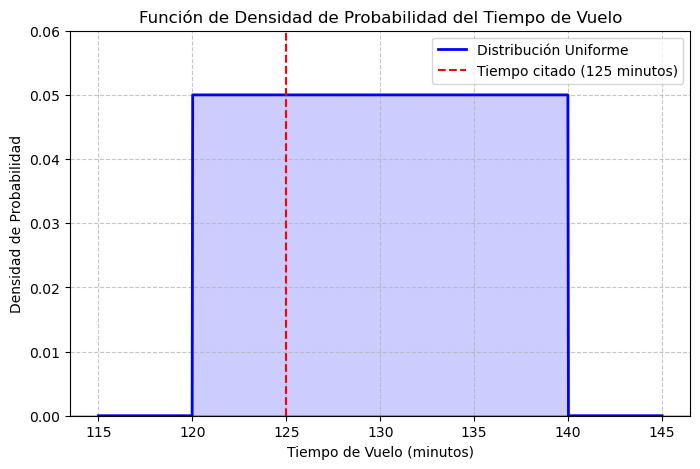


b. Probabilidad de que el vuelo no llegue más de 5 minutos tarde: 0.5000

c. Probabilidad de que el vuelo llegue más de 10 minutos tarde: 0.2500

d. Tiempo de vuelo esperado: 130.00 minutos


In [23]:
# Parámetros de la distribución uniforme
U_a = 120  # 2 horas en minutos (límite inferior)
U_b = 140  # 2 horas y 20 minutos en minutos (límite superior)

# a. Gráfico de la función de densidad de probabilidad (PDF)
x = np.linspace(U_a - 5, U_b + 5, 1000)  # Ampliamos el rango para ver claramente los ceros fuera del intervalo
pdf = np.where((x >= U_a) & (x <= U_b), 1 / (U_b - U_a), 0)  # Densidad de probabilidad uniforme

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label="Distribución Uniforme", color="blue", linewidth=2)
plt.fill_between(x, pdf, alpha=0.2, color="blue")
plt.axhline(y=0, color="black", linewidth=1)  # Línea en y=0 para mayor claridad
plt.axvline(125, color="red", linestyle="--", label="Tiempo citado (125 minutos)")
plt.xlabel("Tiempo de Vuelo (minutos)")
plt.ylabel("Densidad de Probabilidad")
plt.title("Función de Densidad de Probabilidad del Tiempo de Vuelo")
plt.legend()
plt.ylim(0, max(pdf) * 1.2)  # Ajuste del eje Y para mejor visualización
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# b. Probabilidad de que el vuelo no llegue más de 5 minutos tarde
limite_superior_b = 125 + 5  # 130 minutos
P_no_mas_de_5_min_tarde = (limite_superior_b - U_a) / (U_b - U_a)
print(f"\nb. Probabilidad de que el vuelo no llegue más de 5 minutos tarde: {P_no_mas_de_5_min_tarde:.4f}")

# c. Probabilidad de que el vuelo llegue más de 10 minutos tarde
limite_inferior_c = 125 + 10  # 135 minutos
P_mas_de_10_min_tarde = (U_b - limite_inferior_c) / (U_b - U_a)
print(f"\nc. Probabilidad de que el vuelo llegue más de 10 minutos tarde: {P_mas_de_10_min_tarde:.4f}")

# d. Tiempo de vuelo esperado
tiempo_esperado = (U_a + U_b) / 2
print(f"\nd. Tiempo de vuelo esperado: {tiempo_esperado:.2f} minutos")

### Ejercicio 12:
El tiempo necesario para completar un examen final en un curso universitario en particular está distribuido normalmente con una media de 80 minutos y una desviación estándar de 10 minutos. Responde las siguientes preguntas.

a. ¿Cuál es la probabilidad de completar el examen en una hora o menos?

b. ¿Cuál es la probabilidad de que un estudiante complete el examen en más de 60 minutos pero menos de 75 minutos?

c. Supongamos que la clase tiene 60 estudiantes y que el período de examen es de 90 minutos. ¿Cuántos estudiantes esperas que no puedan completar el examen en el tiempo asignado?

In [25]:
# Parámetros de la distribución normal
mu = 80  # Media
sigma = 10  # Desviación estándar

# a. Probabilidad de completar el examen en una hora o menos (60 minutos)
P_60_o_menos = norm.cdf(60, loc=mu, scale=sigma)
print(f"a. Probabilidad de completar el examen en una hora o menos: {P_60_o_menos:.4f}")

# b. Probabilidad de completar el examen en más de 60 minutos pero menos de 75 minutos
P_60_a_75 = norm.cdf(75, loc=mu, scale=sigma) - norm.cdf(60, loc=mu, scale=sigma)
print(f"\nb. Probabilidad de completar el examen en más de 60 minutos pero menos de 75 minutos: {P_60_a_75:.4f}")

# c. Número de estudiantes que no completarán el examen en 90 minutos
P_mas_de_90 = 1 - norm.cdf(90, loc=mu, scale=sigma)
num_estudiantes = 60
estudiantes_no_completaran = P_mas_de_90 * num_estudiantes
print(f"\nc. Número de estudiantes que no completarán el examen en 90 minutos: {estudiantes_no_completaran:.2f}")

a. Probabilidad de completar el examen en una hora o menos: 0.0228

b. Probabilidad de completar el examen en más de 60 minutos pero menos de 75 minutos: 0.2858

c. Número de estudiantes que no completarán el examen en 90 minutos: 9.52


### Ejercicio 13:
La vida útil promedio de un televisor es de 12 años. A menudo, la vida útil de los productos sigue una distribución exponencial de probabilidad. Supongamos que este es el caso para la vida útil de un televisor.

a. ¿Cuál es la probabilidad de que la vida útil sea de 6 años o menos?

b. ¿Cuál es la probabilidad de que la vida útil sea de 15 años o más?

c. ¿Cuál es la probabilidad de que la vida útil esté entre 5 y 10 años?

In [27]:
# Parámetros de la distribución exponencial
media = 12  # Vida útil promedio
lambda_inverso = 1 / media  # Tasa de fallo (lambda)

# a. Probabilidad de que la vida útil sea de 6 años o menos
P_6_o_menos = expon.cdf(6, scale=media)
print(f"a. Probabilidad de que la vida útil sea de 6 años o menos: {P_6_o_menos:.4f}")

# b. Probabilidad de que la vida útil sea de 15 años o más
P_15_o_mas = 1 - expon.cdf(15, scale=media)
print(f"\nb. Probabilidad de que la vida útil sea de 15 años o más: {P_15_o_mas:.4f}")

# c. Probabilidad de que la vida útil esté entre 5 y 10 años
P_entre_5_y_10 = expon.cdf(10, scale=media) - expon.cdf(5, scale=media)
print(f"\nc. Probabilidad de que la vida útil esté entre 5 y 10 años: {P_entre_5_y_10:.4f}")

a. Probabilidad de que la vida útil sea de 6 años o menos: 0.3935

b. Probabilidad de que la vida útil sea de 15 años o más: 0.2865

c. Probabilidad de que la vida útil esté entre 5 y 10 años: 0.2246
